<a href="https://colab.research.google.com/github/SergeiSa/Control-Theory-Slides-Spring-2021/blob/main/%20practice_04_basics_of_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice 4: Basics Of Feedback Control**
## **Goals for today**

---



During today practice we will:



## **Idea of Control and Feedback**
So far we have discussed the methods allowing us to check the stability of the unforced (uncontolled) dynamical systems. Today we will answer a more practical question, namely: **How to make the given dynamical system display desired behavior?** this is one of the questions of concern in the field of **control** theory.

In this class we will mainly consider two sets of problems:
*   **Stabilization** (regulation) a control system (stabilizer, or regulator) is to be designed so that the state of the closed-loop system will be stabilized around a **static point**.
*   **Tracking** (servo) the design objective is to construct a controller (tracker) so that the system output tracks a given time-varying trajectory.

One of the most widely used approaches supporting the solution of the problems above is the so-called **feedback control**


Recall the autonomous system written in state space:
\begin{equation}
\mathbf{\dot{x}}=\boldsymbol{f}(\mathbf{x},\mathbf{u})
\end{equation} 

Let us now assume that one have designed feedback law as follows:
\begin{equation}
u = \boldsymbol{\varphi}(\mathbf{x})
\end{equation} 

<p><img alt="ff_fb" height="150px" src="https://drive.google.com/uc?id=1IN9yuBagy2HzOG45mMauiyEXLWSOxi9K" align="center" hspace="250px" vspace="0px"></p>

One may substitute control law and obtain the equations of the **closed loop** system:
\begin{equation}
\mathbf{\dot{x}}=\boldsymbol{f}(\mathbf{x},\boldsymbol{\varphi}(\mathbf{x})) = \boldsymbol{f}_c(\mathbf{x})
\end{equation} 
now one can use stability tools to study the behaviour of the controlled system.

Let us begin with the simplest case, namely linear systems. 




### **Linear State Feedback**

Recall the linear system in state space form:
\begin{equation}
\mathbf{\dot{x}}=\mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u}
\end{equation}

The general form of feedback that may stabilize our system is know to be linear:
\begin{equation}
\mathbf{u}=-\mathbf{K}\mathbf{x}
\end{equation}

Substitution to the system dynamics yields:
\begin{equation}
\mathbf{\dot{x}}=(\mathbf{A} - \mathbf{B}\mathbf{K})\mathbf{x} = \mathbf{A}_c\mathbf{x}
\end{equation}
Thus the stability of the controlled system is completely determined by the eigen values of $\mathbf{A}_c$ and consequantially by the matrix $\mathbf{K}$


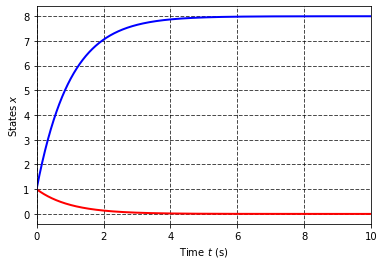

In [ ]:
import numpy as np
from scipy.integrate import odeint

def system_ode(x, t, A, B, K):
    u = - np.dot(K,x)  
    dx = np.dot(A,x) + np.dot(B,u)
    return dx


t0 = 0 # Initial time 
tf = 10 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span

x0 = [1, 1] # Set initial state 

A = [[-1,0],
     [7, 1]]

B = [[0],
     [1]]

K = [[0,1]] 

x_sol = odeint(system_ode, x0, t, args=(A, B, K,)) # integrate system "sys_ode" from initial state $x0$
x1, x2 = x_sol[:,0], x_sol[:,1] # set theta, dtheta to be a respective solution of system states

from matplotlib.pyplot import *

plot(t, x1, 'r', linewidth=2.0)
plot(t, x2, 'b', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'States ${x}$')
xlabel(r'Time $t$ (s)')
show()

### **Example: Stabilization of Linear System**

Consider a following unforced system:

<p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1ouEckIc8hm6IOTJ5uGVJHCwx2tBeyKj8" align="center" hspace="350px" vspace="0px"></p>

Dynamics of this system desribed by following ODE:
\begin{equation}
m\ddot{y} + b \dot{y} + k y = u
\end{equation}

And one can formulate this system in state space as:
\begin{equation}
\dot{\mathbf{x}}
 = \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u} =
\begin{bmatrix}
\dot{y}\\
\ddot{y}
\end{bmatrix}
=
\begin{bmatrix}
0 & 1\\
-\frac{k}{m} & -\frac{b}{m}
\end{bmatrix}
 \begin{bmatrix}
y\\
\dot{y}
\end{bmatrix}+
\begin{bmatrix}
0\\
\frac{1}{m}
\end{bmatrix}
u
\end{equation}

Let us simulate the response of the system with different parameters:

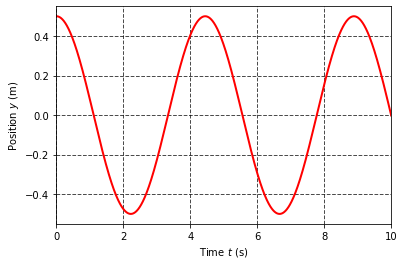

In [ ]:
import numpy as np
from scipy.integrate import odeint

def system_ode(x, t, A, B, K):
    u = - np.dot(K,x)  
    dx = np.dot(A,x) + np.dot(B,u)
    return dx


t0 = 0 # Initial time 
tf = 10 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span
y_0 = 0.5
x0 = [y_0, 0] # Set initial state 

m = 1
b = -0.5
k = 2

A = [[0,1],
     [-k/m, -b/m]]

B = [[0],
     [1/m]]

K = [[0,0.5]] 

x_sol = odeint(system_ode, x0, t, args=(A, B, K,)) # integrate system "sys_ode" from initial state $x0$
y, dy = x_sol[:,0], x_sol[:,1] # set theta, dtheta to be a respective solution of system states

from matplotlib.pyplot import *

plot(t, y, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Position ${y}$ (m)')
xlabel(r'Time $t$ (s)')
show()

>**EXERCISE**: 
*    Find the gains $k_1, k_2$ that will stabilize the following system:
> \begin{equation}
\mathbf{\dot{x}}
=
\begin{bmatrix}
3 & 1\\
1  & 3
\end{bmatrix}
\mathbf{x}
+
\begin{bmatrix}
0\\
1 
\end{bmatrix}
\mathbf{u}
\end{equation}
>  simulate the response. 


**NOTE**

> It is often the case (especially in fully actuated mechanical systems) that one can analyze system response and stability without actually transforming the system to state-space form, for instance, one may directly substitute control law to the system dynamics to analyze closed-loop response.

For instance consider the mass-spring damper above:

\begin{equation}
m\ddot{y} + b \dot{y} + k y = -k_1 y - k_2 \dot{y}
\end{equation}

which yields:

\begin{equation}
m\ddot{y} + (b + k_2) \dot{y} + (k + k_1) y = 0 
\end{equation}

It is obvious now which gains make this system stable

In case of mechanical systems (system of second order equations), the matrix $\mathbf{K}$ represent the so called proportinal-derivative (PD) controller  $\mathbf{K} = [\mathbf{k}_p,\mathbf{k}_d]^T$.





### **Higher Order Systems**

Stabilization of the fully actuated second-order systems is a trivial task, however, in practice, you will face systems with higher dimensions, where defining the feedback gain may not be trivial. Thus one may use so-called pole-placement or LQR techniques

For instnaceRecall the DC motor equations:

\begin{equation}
\begin{bmatrix}
\dot{\theta} \\
\ddot{\theta} \\
\dot{i}
\end{bmatrix} 
=
\begin{bmatrix}
0 & 1 & 0 \\
0 & -\frac{b}{J} & \frac{K_m}{J} \\
0 & -\frac{K_e}{L} & -\frac{R}{L}
\end{bmatrix} 
\begin{bmatrix}
\theta \\
\dot{\theta} \\
i
\end{bmatrix}
+
\begin{bmatrix}
0 \\
0 \\
\frac{1}{L}
\end{bmatrix}
V
\end{equation}

we will assume that full-state is given (measured).

Let us now try to assign stable poles in order to control DC motor

[-2000.  -500.  -100.]
[[ 0.03240182 -0.02699589 -3.99285299]]


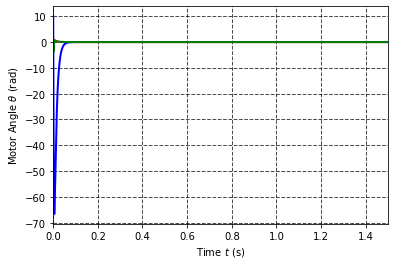

In [ ]:


k_m = 0.0274
k_e = k_m
J = 3.2284E-6
b = 3.5077E-6
L = 2.75E-6
R = 4

A = [[0, 1, 0],
     [0, -b/J, k_m/J],
     [0, -k_e/L, -R/L]]

B = [[0], 
     [0], 
     [1/L]];

P = [-100, -500, - 2000]

from scipy.signal import place_poles
pp =place_poles(np.array(A), np.array(B), np.array(P)) 
print(pp.computed_poles)
K = pp.gain_matrix
print(K)
tf = 1.5 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(t0, tf, N) # Create time span
x0 = [1, 10, 1] # Set initial state 

x_sol = odeint(system_ode, x0, t, args=(A, B, K,)) # integrate system "sys_ode" from initial state $x0$
theta, dtheta, i = x_sol[:,0], x_sol[:,1], x_sol[:,2] # set theta, dtheta to be a respective solution of system states

from matplotlib.pyplot import *

plot(t, theta, 'r', linewidth=2.0)
plot(t, dtheta, 'b', linewidth=2.0)
plot(t, i, 'g', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Motor Angle ${\theta}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

### **Regulation**

In some practical problems we are always want to move our system not to the some equalibrium but to the **desired point** $\mathbf{x}_d$, and stay there ($\mathbf{\dot{x}}_d = \mathbf{0}$). To do so one may consider the change of variables: 
\begin{equation}
\mathbf{\tilde{x}} = \mathbf{x}_d - \mathbf{x} 
\end{equation}


<p><img alt="ff_fb" height="150px" src="https://drive.google.com/uc?id=1E4tNt0rSwXsrGSi4U1cOk0D_Y-q8bFJ-" align="center" hspace="230px" vspace="0px"></p>

For instance applying the full state feedback in the new variables yields:
\begin{equation}
\mathbf{u} = \mathbf{K}\mathbf{\tilde{x}} 
\end{equation}

Thus transforming problem back to the stabilization of new variables $\mathbf{\tilde{x}}$ (control error):
\begin{equation}
\dot{\tilde{\mathbf{x}}}=(\mathbf{A} - \mathbf{B}\mathbf{K})\tilde{\mathbf{x}}
\end{equation}


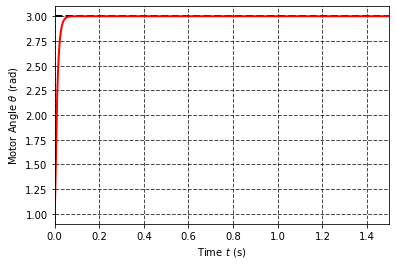

In [ ]:
import numpy as np 
from scipy.integrate import odeint # import integrator routine

def system_ode(x, t, A, B, K, x_d):
    x_e = x_d - x 
    u = np.dot(K,x_e)  
    dx = np.dot(A,x) + np.dot(B,u)
    return dx

x_d = [3, 0, 0]

x_sol = odeint(system_ode, x0, t, args=(A, B, K,x_d,)) # integrate system "sys_ode" from initial state $x0$
theta, dtheta, i = x_sol[:,0], x_sol[:,1], x_sol[:,2] # set theta, dtheta, i to be a respective solution of system states

from matplotlib.pyplot import *

hlines(x_d[0], min(t), max(t), color = 'black', linestyles='--', linewidth=2.0)
plot(t, theta, 'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Motor Angle ${\theta}$ (rad)')
xlabel(r'Time $t$ (s)')
show()